In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

from PIL import Image

In [3]:
img = cv2.imread('../datasets/images/dog.jpg')

In [11]:
cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
quarter_width, quarter_height = img.shape[1] // 4 , img.shape[0] // 4

In [13]:
T = np.float32([[1,0,quarter_width],[0,1,quarter_height]])

In [14]:
T

array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

In [30]:
translated_img = cv2.warpAffine(img,T,(600,600))

In [31]:
cv2.imshow('Traslated Imahe',translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
neg_T = np.float32([[1,0,-75],[0,1,-100]])
upshifted_img = cv2.warpAffine(img,neg_T,(400,400))
cv2.imshow('Translated image',upshifted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Image Rotation</h1>

In [5]:
### Image Rotation

img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_90a = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img, cv2.ROTATE_180)

cv2.imshow('90 Clockwise', img_90)
cv2.imshow('90 Counter Clockwise', img_90a)
cv2.imshow('180', img_180)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [6]:
center = img.shape[1]//2,img.shape[0]//2
center

(200, 200)

In [8]:
angle = 30

R = cv2.getRotationMatrix2D(center,angle,1.0)
rotated_image = cv2.warpAffine(img, R,(400,400))
cv2.imshow('Roatated Image',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
R = cv2.getRotationMatrix2D((200,200),-60,1.0)
rotated_image = cv2.warpAffine(img,R,(400,400))
cv2.imshow('Rotated Image',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
R

array([[  0.5       ,  -0.8660254 , 273.20508076],
       [  0.8660254 ,   0.5       , -73.20508076]])

In [27]:
mask = np.all(rotated_image == [0, 0, 0], axis=-1)
rotated_image[mask] = [255,0, 0]

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Image Resizing</h1>

In [38]:
img_new = cv2.resize(img,(800,800))
img_new.shape
cv2.imshow('resized', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Image Rescaling</h1>

In [39]:
img_new = cv2.resize(img,None,fx = 1.5, fy = 1.5)
cv2.imshow('Rescaled Image',img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Translation using PIL</h1>

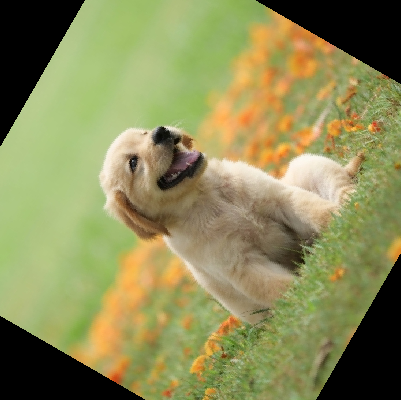

In [45]:
img_pil = Image.open('../datasets/images/dog.jpg')
img_pil.rotate(60)

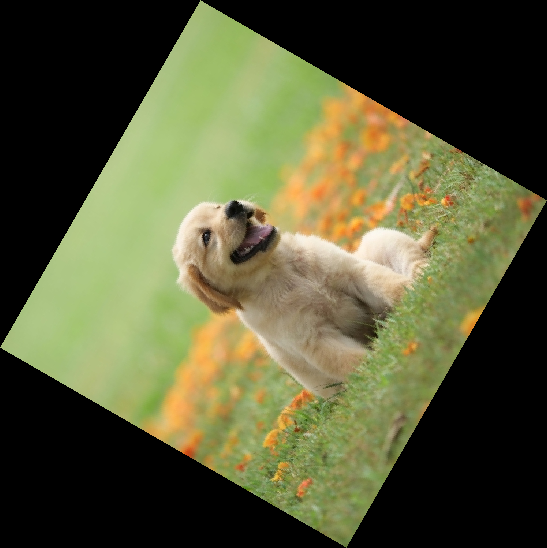

In [46]:
img_pil = Image.open('../datasets/images/dog.jpg')
img_pil.rotate(60,expand=True)

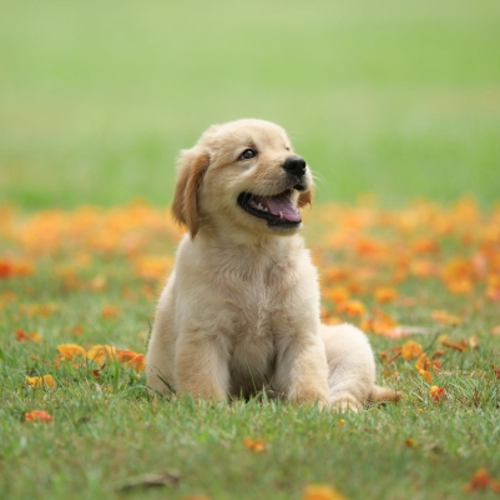

In [51]:
img_pil.resize((500,500))

<h1>Using Sk Image</h1>

In [52]:
img_rgb = plt.imread('../datasets/images/dog.jpg')
img_res = resize(img_rgb,(500,600))
img_res.shape

(500, 600, 3)

Text(0.5, 1.0, 'Resized Image')

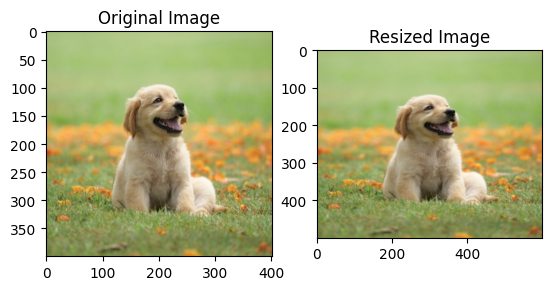

In [55]:
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_res)
plt.title('Resized Image')

<h1>Flipping</h1>

In [58]:
#horizontal_flip
img_hor = cv2.flip(img_rgb,0)

#vertical_flip
img_ver = cv2.flip(img_rgb,1)

#horizontal_flip
img_dig = cv2.flip(img_rgb,-1)

Text(0.5, 1.0, 'diagonally flipped')

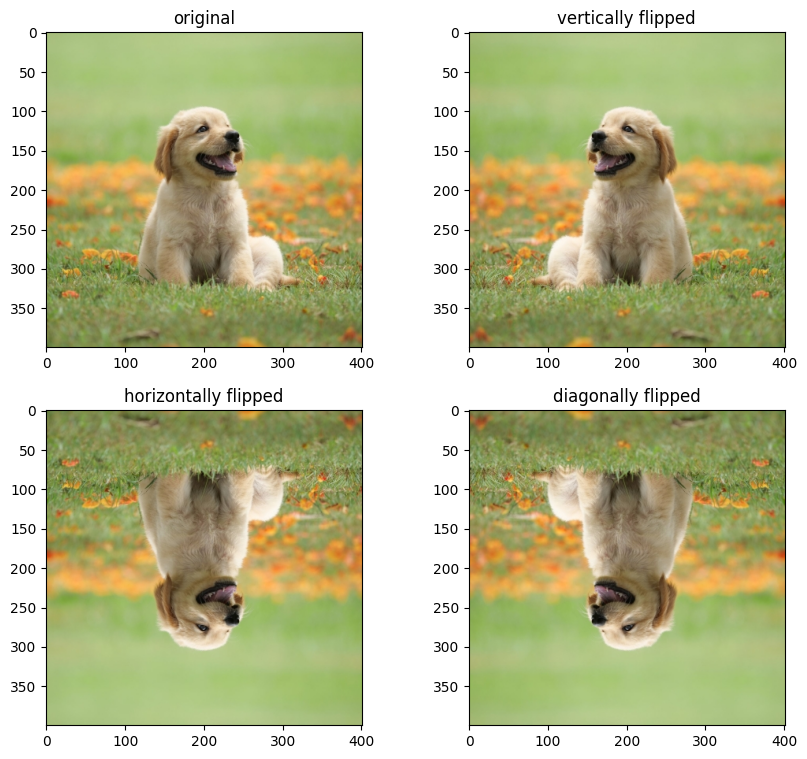

In [64]:
plt.figure(figsize=(10,9))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('original')


plt.subplot(2,2,3)
plt.imshow(img_hor)
plt.title('horizontally flipped')



plt.subplot(2,2,2)
plt.imshow(img_ver)
plt.title('vertically flipped')



plt.subplot(2,2,4)
plt.imshow(img_dig)
plt.title('diagonally flipped')

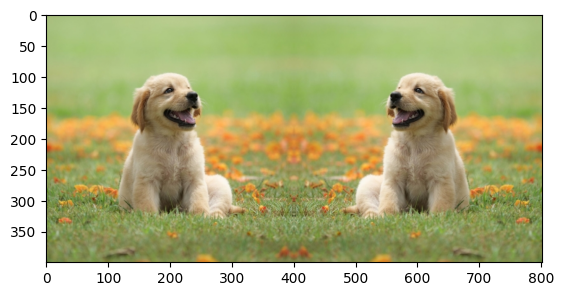

In [68]:
img_sta1 = np.hstack([img_rgb,img_ver])
plt.imshow(img_sta1)

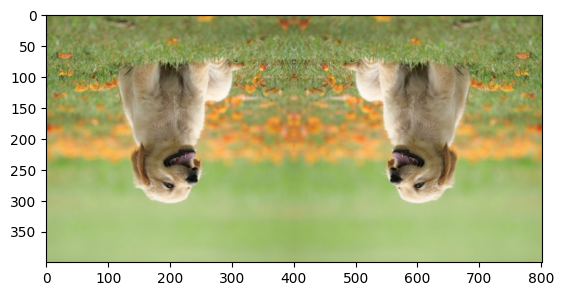

In [69]:
img_sta2 = np.hstack([img_hor,img_dig])
plt.imshow(img_sta2)

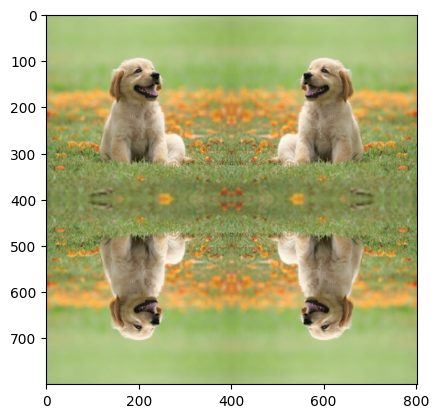

In [70]:
img_sta = np.vstack([img_sta1,img_sta2])
plt.imshow(img_sta)

<h1>Image Cropping</h1>

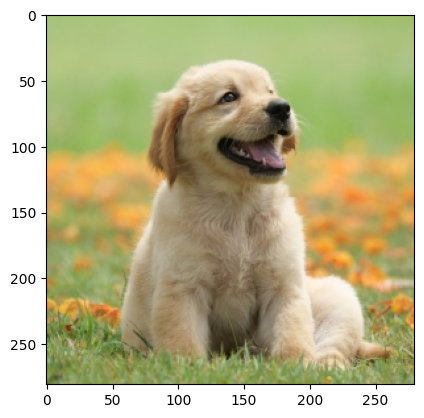

In [74]:
img_cropped = img_rgb[60:img_rgb.shape[1]- 60,60:img_rgb.shape[0]- 60]
plt.imshow(img_cropped)